# Let's see come concrete examples

## The simplest resgression - Linear Regression

Linear regression is the simplest form of regression which can be used to fit data and find a model that can predict future values. As the name implies, this approach tries to fit the data to a linear equation, a line, which minimizes the mean squared error.

As we saw earlier, the taxi data doesn't vary in a predictable linear fashion. So linear regresison isn't the correct approach. The below charts illustrate this without any doubt.

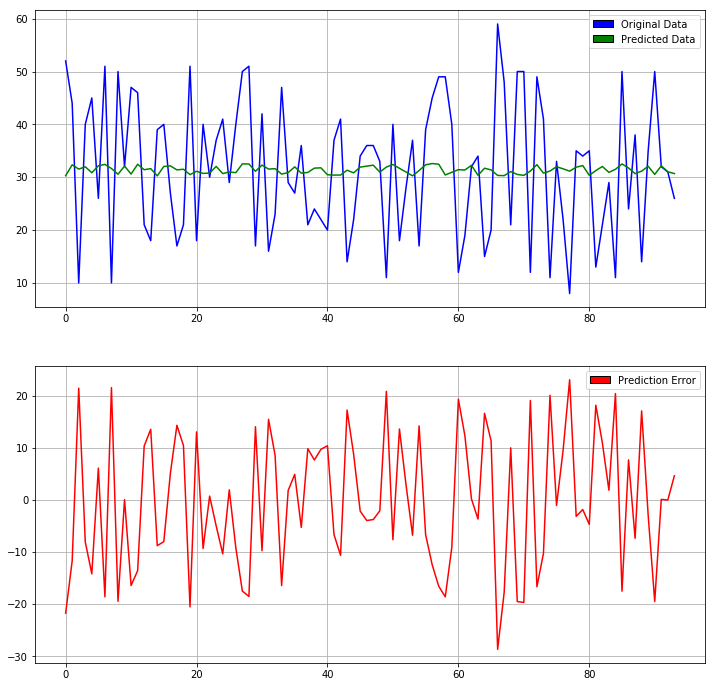

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sgtaxidata import *
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
from ipywidgets import interact

DBNAME="../taxis.db"
DATE="20170627"
LOC="Sengkang"

lat,lon=utils.get_lat_long(LOC)

df=taxis.getdf_loc_date(DBNAME,DATE,lat,lon)

X = np.array(df['Point'])
y = np.array(df['TaxiCount'])
X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

visualize.plot_model(X_test,y_test,model)

In [5]:
print "Score for test data : ",model.score(X_test,y_test)
print "Score for training data : ",model.score(X_train,y_train)

print "Mean absolute error of prediction : ",mean_absolute_error(y_test,model.predict(X_test))
print "Mean square error of prediction : ",mean_squared_error(y_test,model.predict(X_test))
print "Mean square deviation of prediction : ",math.sqrt(mean_squared_error(y_test,model.predict(X_test)))

Score for test data :  -0.0109081249907
Score for training data :  0.00336089151089
Mean absolute error of prediction :  11.1292593543
Mean square error of prediction :  168.330274982
Mean square deviation of prediction :  12.9742157752


## Polynomial regression

Since our data varies by the day, and it looks like it can be approximated by a polynomial equation of some degree, we can also try to extract polynomial features from the data and then perform a linear regression on that.

Again this will not work with 100% correctness as seen in the below charts

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

@interact(d=(0,10,1))
def test_polynomial(d):
    pmodel = Pipeline([('poly', PolynomialFeatures(degree=d)),
                      ('linear', LinearRegression(fit_intercept=False))])

    pX=np.array(df['Point'])
    py=np.array(df['TaxiCount'])
    pX=pX.reshape(-1,1)
    py=py.reshape(-1,1)

    pX_train, pX_test, py_train, py_test = train_test_split(X, y, test_size=0.33, random_state=42)
    pmodel.fit(pX_train, py_train)

    visualize.plot_model(pX_test,py_test,pmodel)

    print "Score for test data : ",pmodel.score(pX_test,py_test)
    print "Score for training data : ",pmodel.score(pX_train,py_train)

    print "Mean absolute error of prediction : ",mean_absolute_error(py_test,pmodel.predict(pX_test))
    print "Mean square error of prediction : ",mean_squared_error(py_test,pmodel.predict(pX_test))
    print "Mean square deviation of prediction : ",math.sqrt(mean_squared_error(py_test,pmodel.predict(pX_test)))

As you can see the polynomial approach worked better, and gave a model that can predict the values, although there are errors in the prediction.

Let's try to see the mean square error of the prediction and the score of the model